# Lab 7 Concurrency, Parallelism

До цього, ми спілкувалися лише про код, який працює послідовно - від інструкції до інструкції программа виконувалася єдиним процесом. І таке виконання програм є нормальним, програма працює на єдиному процесі та єдиному ядрі, з виділенною під неї пам'ять. 

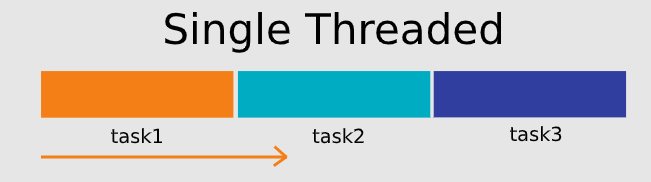

Але - що робити якщо ми маємо зробити якісь складні розрахунки за певний час, чи, наприклад, якщо ми імплементуємо якийсь сервер - який має оброблювати запити від користувачів. При однопоточній моделі виконання - кожен користувач буде змушений чекати доки сервер обробить запит попереднього користувача, уявіть скількі часу буде необхідно щоб обробити 100 запитів?

Для вирішення таких задач існують моделі "паралеллізації" задач. Про які ми сьогодні поговоримо.

## CPU, IO, Memory

Але спершу ми проговоримо наступну річ - комп'ютер, це складна система яка складається з багатьох компонент. "Найшвидша" його компонента в нашому розумінні це, звичайно, процессор, або CPU, яка власне і відповідальна за розрахунки, операції і так далі. Частота обробки команд CPU - вже сягає ГГц. Проте інші компоненти не є настількі швидкими.

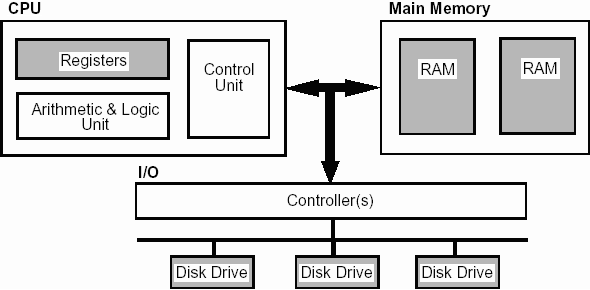

CPU під час виконання тих чи інших задач потребує звертатися до оперативної пам'яті (ОЗУ \ RAM), дані що потрапляють в RAM, в свою чергу мають бути считані з фізичних носіїв - HDD \ SSD, M2SSD і так далі, що додає більшої затримки в цю систему. Додайте до цього ще факт того, що компоненти ПК взаємодіять між собою за допомогою шин даних, які в теж додають затримки.

Найдовші операції, зазвичай це IO (Input-Output) операції, тобто операції считування даних з файлової системи, під час того, як файли відкриваються, та проходить запис\считування CPU, здебільшого, не приймає участі. І знаходиться в режимі очікування.

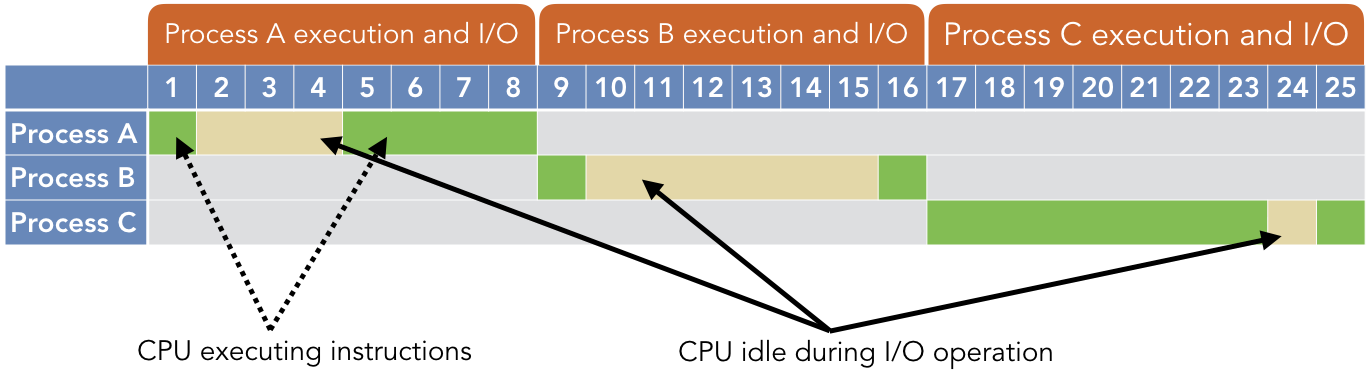

Через те, що процесор, здебільшого може бути не зайнятий під час виконання програм, ми можемо дати йому виконувати якусь іншу задачу, поки чекаємо закінчення операції - що не залешить від CPU.

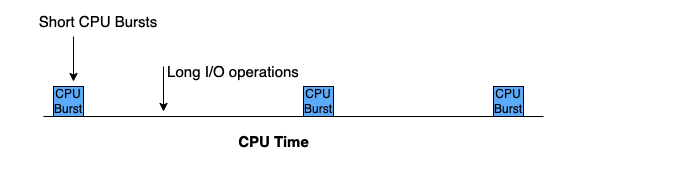

Тепер давайте уявимо - що, якщо б в нас була якась система, яка дивиться чим саме зайнятий процесор (уявимо що в нього лише одне ядро), і якщо процесор вільний, він перемикає таску на ту, де він потрібен. Умовно - ми виконуємо таску N, коли процесор знаходиться в простої, виконуємо таску N + 1, коли процесор виконав якусь роботу в тасці N + 1, перемикаємося на ту таску, де для нього є робота.

Вітаю, ми вигадали операційну систему (точніше її частину, яка зайнята менеджментом процесів). Ваш комп'ютер одночасно виконує безліч тасок, хоча насправді, процесор (якщо в нього одне ядро) зайнятий лише однією таскою, проте через таке "жонглювання" тасками \ процесами, нам здається що процеси виконуються паралельно.

За умов, коли ваш процесор має декілька ядер (а він, скорі за все, має, при чому і фізичних і логічних), така система трошки ускладнюється вибором незайнятого ядра з пула ядер. Але ситуація близька до тої, що була описана попередньо.

## Concurrency

**Concurrency** - одночасність це спроможність одночасно виконувати задачі. Причому, така одночасність реалізована методом, що був описаний в попередньому параграфі, тобто, в якийсь момент часу, процесор зайнятий лише однією з тасок, повертаючись до тих, де в нього є робота.


Давайте, в якості приклада, створимо дві функції, які мають дорахувати до 15 та завершити свою роботу і виконаємо їх в звичайному процедурному стилі, одна за одною:

In [10]:
def task(task_name: str):
    i = 0
    while True:
        print(f"<{task_name}>: {i}")
        i += 1
        time.sleep(1)
        if i == 15:
            break

task("task1")
task("task2")

<task1>: 0
<task1>: 1
<task1>: 2
<task1>: 3
<task1>: 4
<task1>: 5
<task1>: 6
<task1>: 7
<task1>: 8
<task1>: 9
<task1>: 10
<task1>: 11
<task1>: 12
<task1>: 13
<task1>: 14
<task2>: 0
<task2>: 1
<task2>: 2
<task2>: 3
<task2>: 4
<task2>: 5
<task2>: 6
<task2>: 7
<task2>: 8
<task2>: 9
<task2>: 10
<task2>: 11
<task2>: 12
<task2>: 13
<task2>: 14


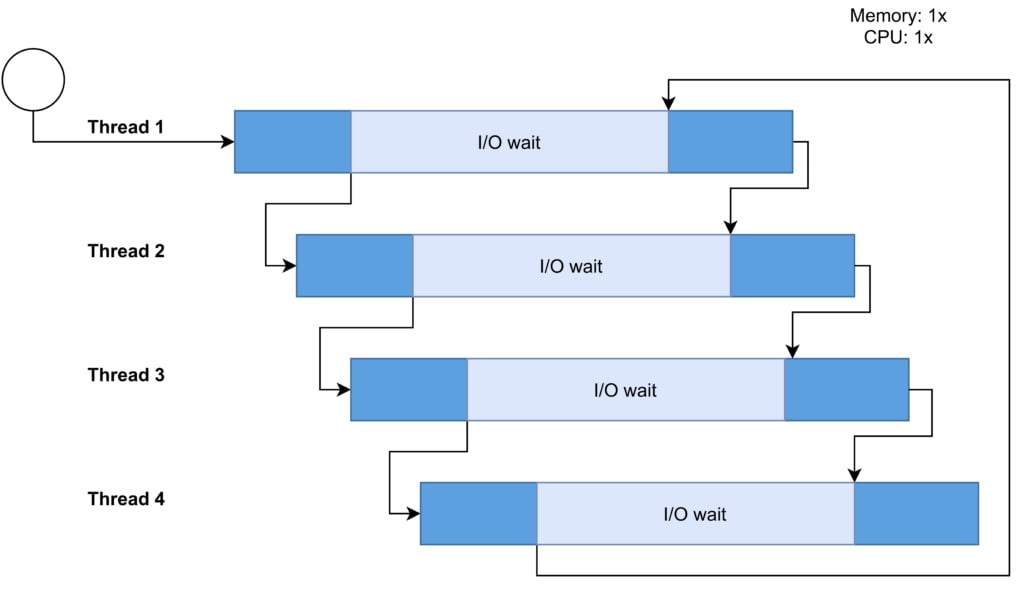

В python, одночасність реалізована декількома підходами - **Pre-emtive multitasking** та **Cooperative multitasking**

**Pre-emtive multitasking** - або випериджаюча мультізадачність (упреждающая мультизадачность). Такий підхід до реалізація мультізадачності також називають `threading` - для кожної задачі ми створюємо окремий тред, про який знає система, і передаємо керування цими тредами, в першому наближенні, до операційної системи, яка, в свою чергу, виконує перемикання між тредами. 

Такий тип мультізадачності називається так, бо система попереджає треди, що вони будуть перемкнуті, від того й назва. Біль детальніше можна прочитати [тут](https://en.wikipedia.org/wiki/Preemption_%28computing%29#Preemptive_multitasking)

В пайтоні, такий тип мультізадачності реалізований завдяки модулю `threading`, додатково з чергами, якими користуються для передачі даних між тредами, івентами, і проч. Детальніша документація на бібліотеку `threading` ви можете знайти [тут](https://docs.python.org/3/library/threading.html)

In [11]:
import threading
import time

def task(thread_name: str):
    i = 0
    while True:
        print(f"<{thread_name}>: {i}")
        i += 1
        time.sleep(1)
        
        if i == 15:
            break

thread1 = threading.Thread(target=task, args=("Thread 1", ))
thread2 = threading.Thread(target=task, args=("Thread 2", ))

thread1.start()
thread2.start()

while thread1.is_alive() and thread2.is_alive():
    print(f"<main>: we are in main thread")
    time.sleep(1)
    
thread1.join()
thread2.join()

<Thread 1>: 0<Thread 2>: 0

<main>: we are in main thread
<Thread 2>: 1<Thread 1>: 1<main>: we are in main thread




**Cooperative Multitasking** в свою чергу, не віддає контроль над виконанням в операційну систему, а імплементує власну систему контролю над виконанням тасок, де користувач сам може віддавати контроль в іншу таску користуючись примітивами (в **pre-emtive multitasking** це теж можливо) синтаксісу. 

В пайтоні, такий тип мультізадачності реалізований завдяки модулю `asyncio`, де кожна таска є по суті генератором. Детальніше про `asyncio` ми поговоримо на наступних лекціях. Але той самий приклад ми можемо релізувати наступним чином:

Оскількі `jupyter` вже імплементує свою систему керування тасками, скопіюйте код знизу та запустіть в окремому файлі:

In [ ]:
import asyncio

async def task(task_name: str):
    i = 0
    while True:
        print(f"<{task_name}>: {i}")
        i += 1
        await asyncio.sleep(1)
        
        if i == 15:
            break

task1_coro = task("task 1")
task2_coro = task("task 2")

async def task_starter(*tasks):
    await asyncio.gather(*tasks)

if __name__ == "__main__":
    asyncio.run(task_starter(task1_coro, task2_coro))

## Parallelism

До цього момента, ми роздивлялися мультізадачність лише через призму опрацювання наших задач на одному ядрі і в єдиному процесі, проте як вже було сказано раніше, сучасні комп'ютери мають багато ядер, а інколи, ці ядра вже мають інструкції по паралелізації задач.

**Paralellism** це спроможність програми виконувати задачі справді одночасно, або паралельно. В пайтоні це реалізовано за допомогою `multiprocessing`. 

Таких підхід не працює на одному ядрі. Він створює окремі процеси і віддає їх на керування операційній системі, як окрему програму. В умовах пайтону, це значить що запускається ще один інтерпритатор, в який подаються дані, і він працює окремо, і зв'язку між цими інтерпритаторами не має (крім `queue` або `pipe`), це значить що якщо ви модифікуєте якусь змінну в одному процесі, іншний взагалі не буде знати про це. Потім, так само як процеси починалися, вони і завершуються, тобто пайтон зберігає результат роботи окремого процеса в файл, а початковий процес відкриває його і ви отримуєте результат.

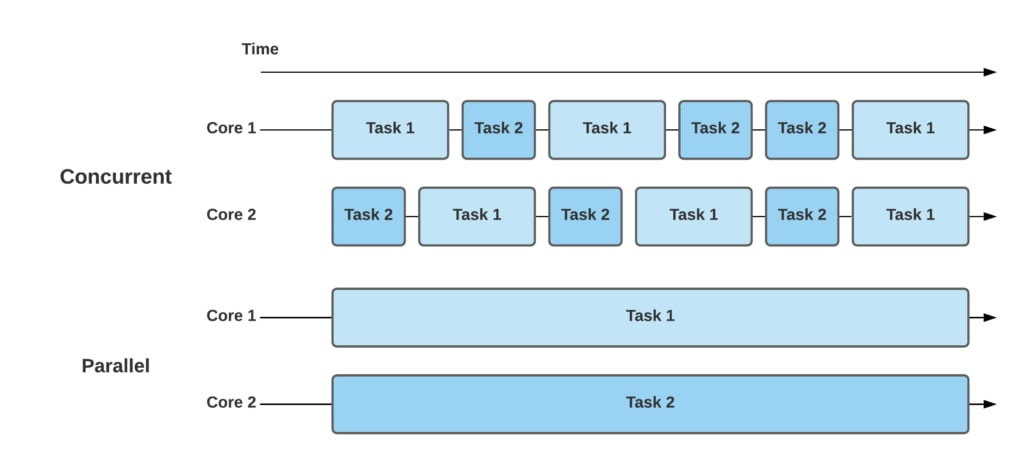

Як вже було сказано, в пайтоні це реалізовано за допомогою бібліотеки `multiprocessing`, її документація знаходиться [тут](https://docs.python.org/3/library/multiprocessing.html). Вона в своєму сінтаксису дуже схожа на `threading`, проте імплементація тих самих примітивів дуже сильно відрізняється.

Також, оскількі сінтаксіс мультіпроцесінгу потребує старт із окремого файла та з конструкцією `if __name__ == "__main__"`, виконайте наступний код користуючись окремим файлом:

In [15]:
import multiprocessing as mp
import time


def task(process_name: str):
    i = 0
    while True:
        print(f"<{process_name}>: {i}")
        i += 1
        time.sleep(1)

        if i == 15:
            break


p1 = mp.Process(target=task, args=("process 1", ))
p2 = mp.Process(target=task, args=("process 2", ))



if __name__ == '__main__':
    p1.start()
    p2.start()
    while p1.is_alive() and p2.is_alive():
        print(f"<main>: we are in main thread")
        time.sleep(1)

<main>: we are in main thread


Як ми можемо бачити, код в процесах виконується невпопад, але це істино паралельне виконання ваших задач.

Давайте створимо ще один приклад, який покаже нам що це дійсно паралельні процеси:

In [ ]:
from multiprocessing import Process
import os

def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

def f(name):
    info('function f')
    print('hello', name)

if __name__ == '__main__':
    info('main line')
    p1 = Process(target=f, args=('taras',))
    p2 = Process(target=f, args=('max', ))
    p1.start()
    p2.start()


    p1.join()
    p2.join()

```
main line
module name: __main__
parent process: 15752
process id: 19692
function f
module name: __mp_main__
function f
module name: __mp_main__
parent process: 19692
process id: 3740
hello taras
parent process: 19692
process id: 7632
hello max
```

Що цікавого ми бачимо на цьому аутпуті? Те, що модулі дійсно інші, з яких запускається код, це ми бачимо по тому, що файл з якого ми запустили наш код, має назву `module name: __main__`, а файл процесу - `module name: __mp_main__`.

Також, це дійсно різні процеси, це ми бачимо по `process id: 3740`, `process id: 19692`, `process id: 3740`, а два "дитячі" процеси мають спільного батька - `parent process: 19692`.

Також, якщо ви запустите цей код заново - у вас буде інший аутпут знову і знову, це саме через те що процеси віддані на керування системою і ви майже (з оговорками) не можете контролювати їх виконання.

## Single Threaded | Concurrent | Parallel

Резюмуючи, давайте знову продивимося різницю виконання одним потоком, "одночасність" та паралеллізацію.

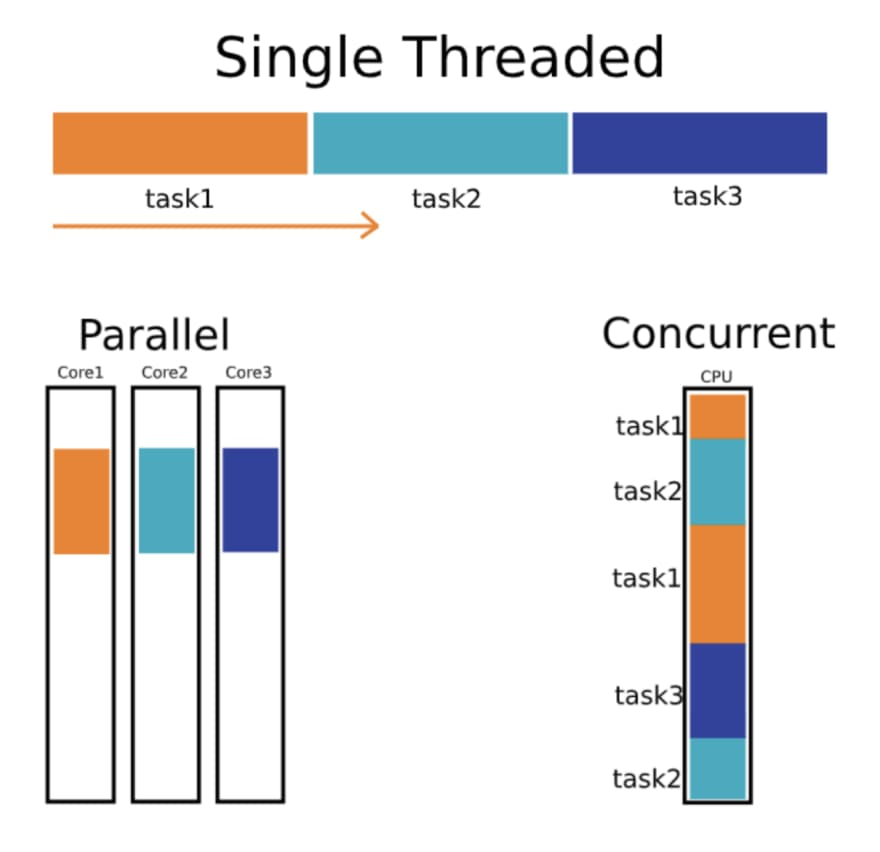

| Тип мультізадачності | Особливість | Кількість процесів |
| :- | -: | :-: |
| Однопоточне виконання | Виконує інструкція за інструкцією | 1
| Pre-emptive multitasking (threading) | Одночасність реалізована перемиканням тредів, якими керує OS | 1
| Cooperative multitasking (asyncio) | Одночасність реалізована перемиканням задач, якими керує цикл виконаня і користувач через примітиви | 1
| Multiprocessing (multiprocessing) | Створює окремий процес і задачі виконуються незалежно одна від іншої. Процесами керує ОС | N

Так коли ж користуватися тим чи іншим підходом? Тут не можна сказати однозначно, проте, логічний вивод наступний:

* Процеси "важчі" для системи, проте якщо вам необхідно робити CPU-bound задачі, і їх треба виконати багато - наприклад якісь складні розрахунки по оптимізації, чи моделюванню, зазвичай користуються мультіпроцесінгом, щоб пришвидшити виконання. Також, окремі процеси можуть створювати свої треди, і виконання буде як на зображенні нижче:

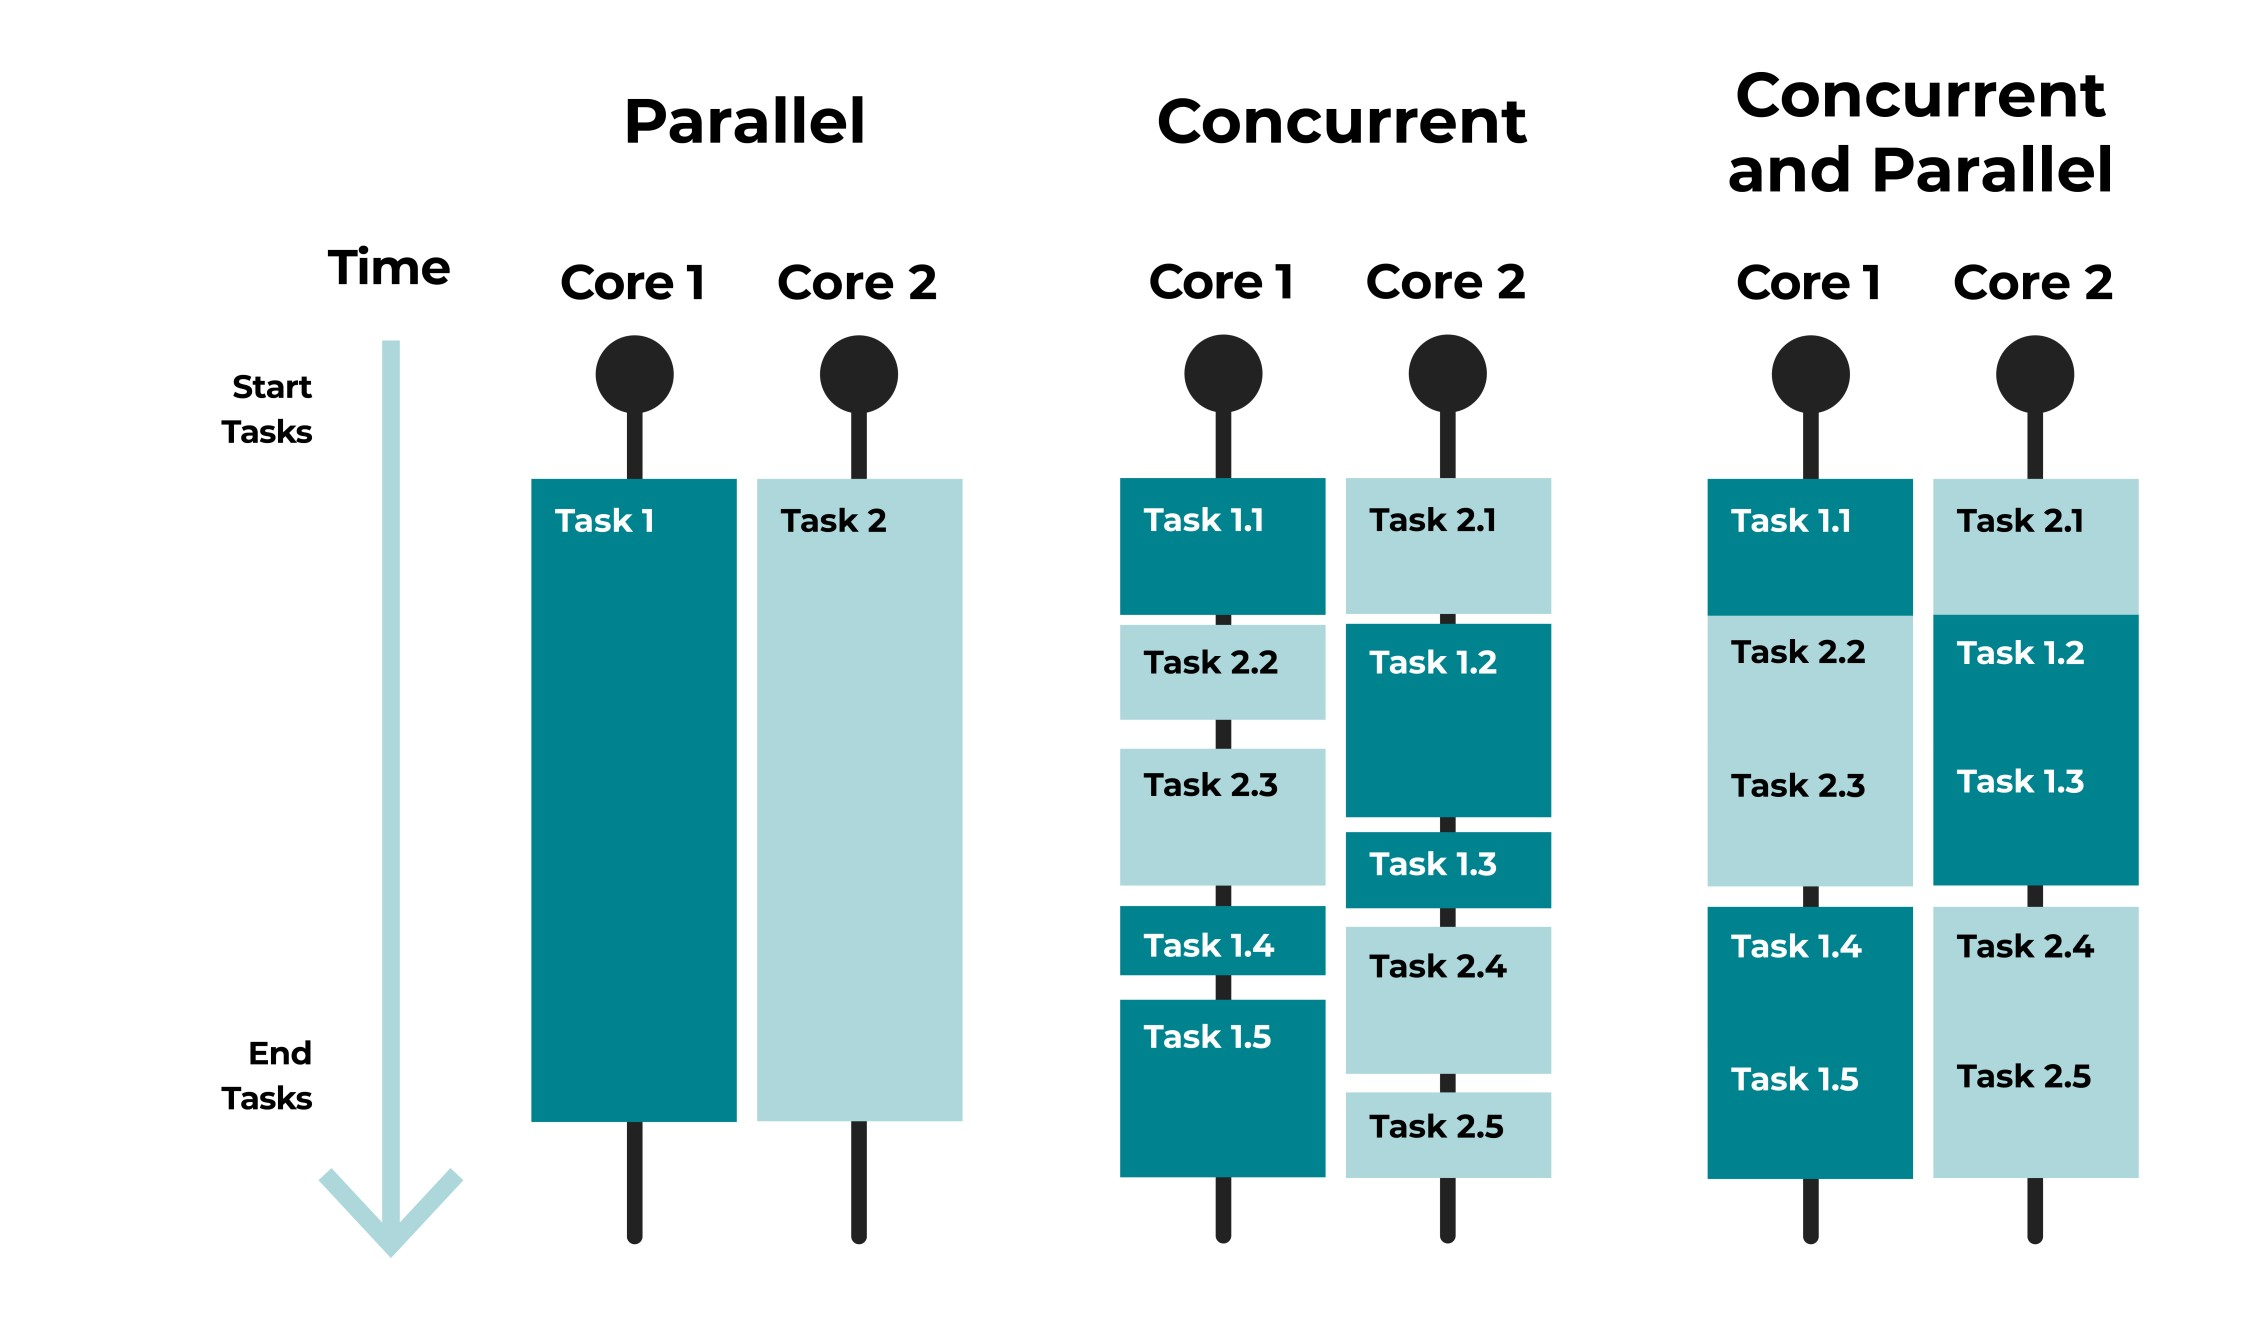

* Якщо ваша задача пов'язана з виконанням робот, які не пов'язані з розрахунками, наприклад, створити DDOS машину, яка буде кидати 1000 запросів на секунду і очікувати відповідь, краще користуватися тредами, все одно більшість "часу" ваш процесор буде чекати поки відповідь прийде. В такому випадку краще користуватися `Concurrency`

* Ну і якщо ви освоїли `asyncio`, яка є насправді складною парадігмою, краще користуватися нею, проте, як і у всього, в `asyncio` є своя область виконання, і свої мінуси і плюси відповідно.

* Але, якщо вам можна НЕ користуватися будь якою формою мульізадачності, краще нею не користуйтеся, а робіть все в єдиному треді, оскількі, як не парадоксально, якщо вам не треба оброблювати 5+ файлів, чи писати запроси, чи робити задачі з багатьма задачами (!), виконання в одному треді буде найшвидшим.